In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, utils
import sklearn
import numpy as np

import sys
sys.path.append('../../')

from processing.fftdataset import FFT2DImageDataset
from util.augment import *
from util import augmentations

from PIL import Image

from skimage import io, transform
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
root_dir = '/Volumes/ADAM LI/pydata/output_fft/tngcenter/win500_step250/'
root_dir = '/Volumes/ADAM LI/pydata/output_fft/asimages/realtng/'
datasetnames = []

chanmeans = [0.485, 0.456, 0.406]
chanstd = [0.229, 0.224, 0.225]
imsize = 32

In [94]:
data_transform = transforms.Compose([
    transforms.ToPILImage(mode='RGBA'),
#     transforms.RandomApply(transforms, p=0.5),
#     augmentations.RandomLightingNoise(),
#     transforms.RandomSizedCrop(2),  
#     transforms.CenterCrop(3),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=5, 
                            resample=False, 
                            expand=False, 
                            center=None),
    transforms.RandomAffine(degrees=5, 
                            translate=(0.1,0.1), 
                            scale=None, 
                            shear=5, 
                            resample=False, 
                            fillcolor=0),
    transforms.ToTensor(),
    transforms.Normalize(mean=chanmeans,    # apply normalization along channel axis
                         std=chanstd),
    augmentations.InjectNoise(),
])


dataset = FFT2DImageDataset(root_dir, datasetnames, transform=data_transform)
dataloader = DataLoader(dataset, 
                    batch_size=1,
                    shuffle=True, 
                    num_workers=1)

print(dataloader)
print(dataloader.dataset)

In [95]:
for i_batch, sample_batched in enumerate(dataloader):
    images_batch, ylabels = sample_batched[0], sample_batched[1]
    print(i_batch)
    print(images_batch.shape)
    print(ylabels.shape)
    break

0
torch.Size([1, 4, 32, 32])
torch.Size([1, 2])


torch.Size([32, 32, 4])
(32, 32, 4)
(32, 32)
(32, 32, 4)


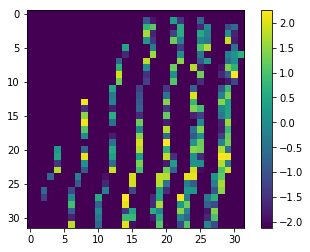

In [79]:
# Get the color map by name:
cm = plt.get_cmap('jet')
image = np.swapaxes(images_batch.squeeze(),0,2)
print(image.shape)
# Apply the colormap like a function to any array:
# image = cm(image)

# image *= 255.0/image.max()
image = image.numpy()

plt.figure()
plt.imshow(image[...,0])
plt.colorbar()

# Obtain a 4-channel image (R,G,B,A) in float [0, 1]
# But we want to convert to RGB in uint8 and save it:
print(image.shape)
img = Image.fromarray((image[:, :, :]).astype(np.uint8))
print(img.size)
print(np.array(img).shape)
# print(img.getchannel(0))
plt.imshow(img)

In [27]:
# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, ylabels = sample_batched[0], sample_batched[1]
    
    # get the batch size and imsize
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    print("Batch size and im size are: %s %s" % (batch_size, im_size))

    images_batch = images_batch[0,0,...]
    images_batch = np.swapaxes(images_batch, 0,2)
    images_batch = images_batch[:,np.newaxis,...]
    images_batch = [im for im in images_batch]
    grid = utils.make_grid(images_batch, normalize=True)
    print(grid.shape)
    img = grid.numpy().transpose((1, 2, 0))
    print(img.shape)
    plt.imshow(img, cmap='jet')
    plt.title('Batch from dataloader')

In [ ]:
# %matplotlib qt5

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched[0].size(), sample_batched[1].size())

    # observe 0th batch and stop.
    if i_batch == 0:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
#         plt.colorbar()
#         plt.ioff()
        plt.show()
        break

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import random

import scipy.misc
lena = scipy.misc.face()
img = transforms.ToTensor()(lena)
imglist = [img, img, img, img.clone().fill_(-10)]
%matplotlib inline
def show(img):
    print(img.shape)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
show(make_grid(imglist, padding=100, normalize=True))
